# Tweets analysis using the Logistic Regression Algorithm

we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. Let us import them now as well as a few other libraries we will be using.





#### install the below backages

In [92]:
import numpy as np

import matplotlib.pyplot as plt
import random

from termcolor import cprint

import re # regular expression package
import string #string module

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords # download stop words
from nltk.stem import PorterStemmer # module for stemming
from nltk.tokenize import TweetTokenizer # module ofr tokenizing

#### download twitter samples data

In [93]:
"DownloadedSuccessfully" if nltk.download('twitter_samples') else "Download Failed"

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/arpansaini/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


'DownloadedSuccessfully'

#### From the downloaded tweets, get only the tweet strings and then check if you can read the tweets

Results of below print \
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :) \
hopeless for tmr :(  \ 
<class 'list'>  \ 
5000 \ 
<class 'list'> \
5000 \

In [99]:
# Get samples
positiveTweets =  twitter_samples.strings('positive_tweets.json')
negativeTweets =  twitter_samples.strings('negative_tweets.json')
print(positiveTweets[0],negativeTweets[0],type(positiveTweets), len(positiveTweets),type(negativeTweets), len(negativeTweets),sep='\n') 

# Get labels
labels = np.append(np.ones((len(positiveTweets),1)), np.zeros((len(negativeTweets),1)),axis=0)
labels

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
hopeless for tmr :(
<class 'list'>
5000
<class 'list'>
5000


array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

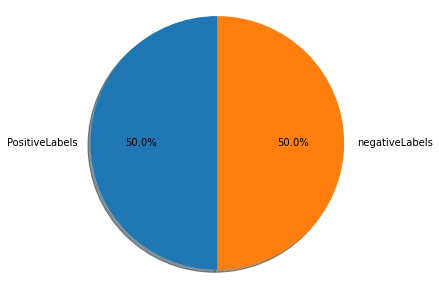

In [74]:
# Check counts in each categories

fig = plt.figure(figsize=(5,5))
sizes = (len(positiveTweets),len(negativeTweets))
labels = ['PositiveLabels','negativeLabels']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()



In [75]:
print('\d62828' + 'test')

\d62828test


In [76]:
# checking Random tweets from positive and negative categories. 
cprint(positiveTweets[random.randint(0,5000)] , "green", attrs=["bold"])
cprint(negativeTweets[random.randint(0,5000)] , "red", attrs=["bold"])

@dvntownsend I thought that you wanted to take  it slower for while.. :D very glad though
@hfaithdavis poor kids momma died :(


### Preprocessing of tweets

data preprocessing is one of the critical step in any machine learning. it includes clearning and formatting before feeding into the machine learning algorithm. FOR NLP the preprocessing steps are comprised of the following steps.  

- Tokenize the string
- lower casing. 
- removing stop words and puncuations. 
- Remove URLS and Handles
- stemming ( Convert all words to it's orgin words like tunning, tunned to tun. etc.  


### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [81]:
# Pick below example for preprocessing and then generalize the idea on all the tweets.
tweet = positiveTweets[2277]
print(tweet)

nltk.download('stopwords')

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arpansaini/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [82]:
def preprocessing(tweet):
    
    processed_tweet = []
    
    # Remove hpyterlinks and handles.
    # Removing old style retweet text "RT"     
    tweet2 = re.sub(r'^RT[\s]+', '', tweet)
    # Removing hyper link     
    tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
    # Remvoing hash tag     
    tweet2 = re.sub(r'#', '', tweet2)
    #lower casing. 
    tweet2 = tweet2.lower()
    
    # Tokenizing the string. 
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet2)
    
    
    # removing stop words and puncuations
    stopwords_english = stopwords.words('english')
    # string.punctuation
    
    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and word not in string.punctuation): # remove stopwords and remove punctuation
            processed_tweet.append(word)
    
    # stemming
    stemmer = PorterStemmer() 

    # Create an empty list to store the stems
    tweets_stem = [] 

    for word in processed_tweet:
        stem_word = stemmer.stem(word)  # stemming word
        if stem_word not in tweets_stem:
            tweets_stem.append(stem_word)  # append to the list

    
    return tweets_stem
    

    

In [86]:
print("")
cprint(tweet,"red",attrs=["bold"])
processed_tweet = preprocessing(tweet)
print("")
cprint(processed_tweet,"green",attrs=["bold"])

# cprint(,"red",attrs=["bold"])


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'favourit', 'happi', '…']


### Extract Features and visualize them